In [62]:
#imports
import os;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [63]:
#list files
path = "D:\\random\\python\\OSRS_Prices"
files = os.listdir(path)
### print(files)

#pick files
rsbuddy_files = [f for f in files if 'rsbuddy' in f]
### print(rsbuddy_files)

In [64]:
#initialize empty dataframe
df = pd.DataFrame()

#Loop over list of files to append to empty dataframe
for f in rsbuddy_files:
    data = pd.read_csv(path+'\\'+f,names=['item_id','date','buyprice','sellprice','buyquantity','sellquantity'],header=None,parse_dates = ['date'])
    df = df.append(data,sort=True)

In [65]:
df = df.set_index(['item_id','date'])
df = df.loc[~df.index.duplicated(keep='last')]
df.head()

buyprice  buyquantity   sellprice  sellquantity
item_id date                                                                  
13263.0 2019-05-17 16:30:00         0.0          0.0  28693837.0           4.0
        2019-05-17 17:00:00  28717466.0          3.0  28729949.0           1.0
11095.0 2019-05-17 16:30:00         0.0          0.0      2306.0         190.0
        2019-05-17 17:00:00         0.0          0.0      2315.0         208.0
        2019-05-17 17:30:00      2349.0        100.0      2301.0        1079.0

In [66]:
df.dtypes

buyprice        float64
buyquantity     float64
sellprice       float64
sellquantity    float64
dtype: object

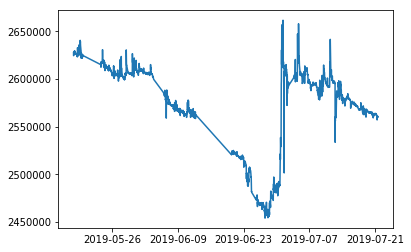

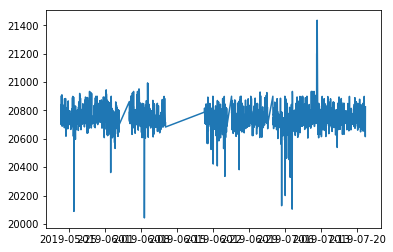

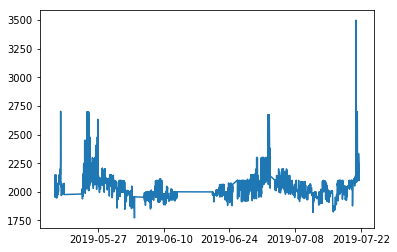

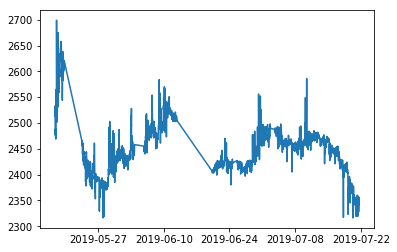

In [67]:
list = [4151,1163,577,536]
for id in list:
    data = df.loc[id]
    mean = data[data['buyprice'] != 0].mean(skipna=True)
    data = data.replace(0,np.nan)
    # REMOVE DUPLICATES
    data = data.loc[~data.index.duplicated(keep='last')]
    # REINDEX MISSING DATES
    mind = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").min()
    maxd = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").max()
    r = pd.date_range(start=mind,end=maxd, freq='30min')
    data = data.reindex(r,fill_value=np.nan)
    # FILL NAN
    data = data.interpolate(method ='linear', limit_direction ='forward')
    x = data.index.values
    y = data['buyprice']
    plt.plot(x,y)
    plt.show()

# data = data.reset_index(level=['date'])



In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
def mypplot(param,data):
    years = mdates.WeekdayLocator()  # every year
    months = mdates.WeekdayLocator()  # every month
    years_fmt = mdates.DateFormatter('%m')

    fig, ax = plt.subplots()
    ax.plot(data.index.values, param, data=data)


    datemin = np.datetime64(pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").min(), 'm')
    datemax = np.datetime64(pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").max(), 'm') + np.timedelta64(1, 'm')
    ax.set_xlim(datemin, datemax)


    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()
    print('dataset: '+param)
    plt.show()
    
# mypplot('buyprice',whipdata)

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: diff
dataset: diff


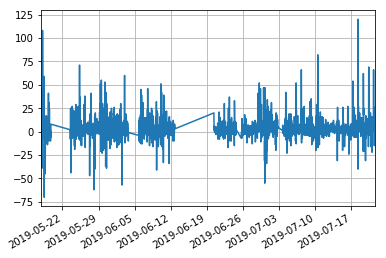

TestDataset: diff
dataset: diff


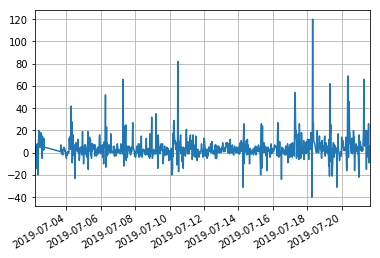

D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

Test Mean Squared Error (smaller the better fit): 123.696


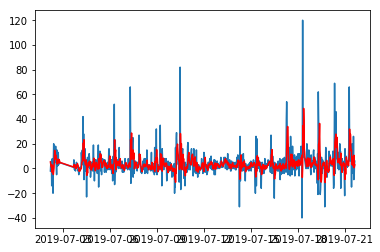

diff Error: 6.364129006193663
                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


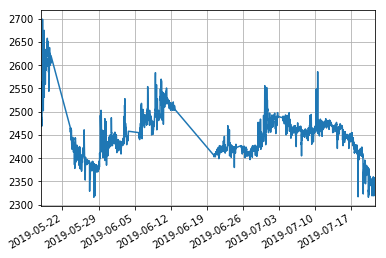

TestDataset: buyprice
dataset: buyprice


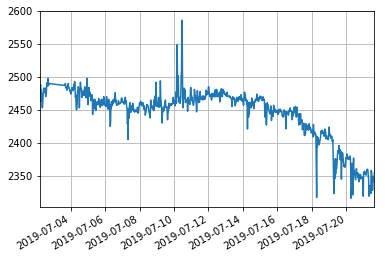

D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

Test Mean Squared Error (smaller the better fit): 111.580


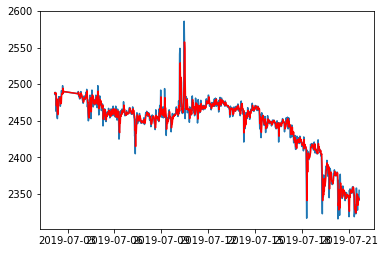

buyprice Error: 5.910605016427857
                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: sellprice
dataset: sellprice


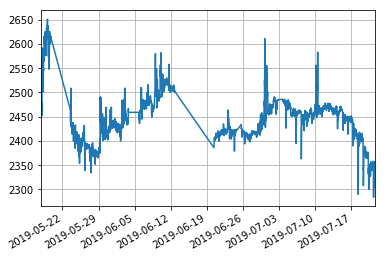

TestDataset: sellprice
dataset: sellprice


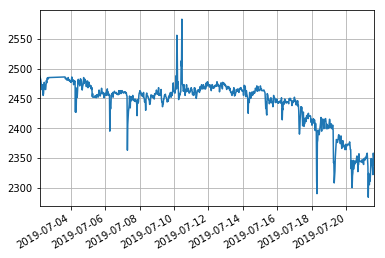

D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

Test Mean Squared Error (smaller the better fit): 116.470


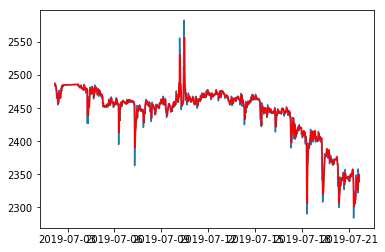

sellprice Error: 5.311328617699027


In [69]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


def get_data(item_id,parameter):
    data = df.loc[item_id]
    print(data.head())
    data = data.replace(0,np.nan)
    # REMOVE DUPLICATES
    data = data.loc[~data.index.duplicated(keep='last')]
    # REINDEX MISSING DATES
    mind = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").min()
    maxd = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").max()
    r = pd.date_range(start=mind,end=maxd, freq='30min')
    data = data.reindex(r,fill_value=np.nan)
    # FILL NAN
    data = data.interpolate(method ='linear', limit_direction ='forward')
    # difference buy and sellprice
    data['diff'] = data['buyprice']-data['sellprice']
    data = data.sort_index()
    # preview
    print('Full Dataset: ' + parameter)
    mypplot(parameter,data)
    
    return data

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    global model,model_fit
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
def function(item_id,param):
    err = []
    
    data = get_data(item_id,param)
    ActualData = data[[param]].values
    #Size of exchange rates
    NumberOfElements = len(ActualData)
    ##print(NumberOfElements)
    #Use 70% of data as training, rest 30% to Test model
    TrainingSize = int(NumberOfElements * 0.7)
    TrainingData = ActualData[0:TrainingSize]
    TestData = ActualData[TrainingSize:NumberOfElements]
    
    
    data = data[TrainingSize:NumberOfElements]
    print('TestDataset: '+ param)
    mypplot(param,data)
    
    #new arrays to store actual and predictions
    Actual = [x for x in TrainingData]
    Predictions = []
    global LagPred
    LagPred = []

    #in a for loop, predict values using ARIMA model
    for timepoint in range(len(TestData)):
        ##print(timepoint)
        ActualValue =  TestData[timepoint]
        ##print(ActualValue)
        #forcast value
        Prediction = StartARIMAForecasting(Actual, 3,1,0)    
        # print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
        err.append(abs(ActualValue-Prediction))
        #add it in the list
        Predictions.append(Prediction)
        Actual.append(ActualValue)
        
        
        # print(Actual)
        
    #Print MSE to see how good the model is
    Error = mean_squared_error(TestData, Predictions)
    print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
    # plot
    pyplot.plot(data.index.values,TestData)
    pyplot.plot(data.index.values,Predictions, color='red')
    pyplot.show()
    print(param + ' Error: ' + str(np.mean(err)))

function(536,'diff')
function(536,'buyprice')
function(536,'sellprice')

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


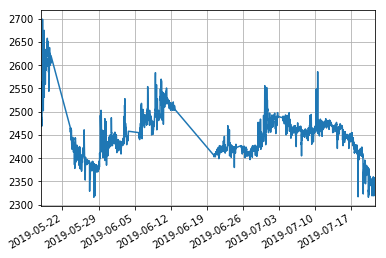

dataset: diff


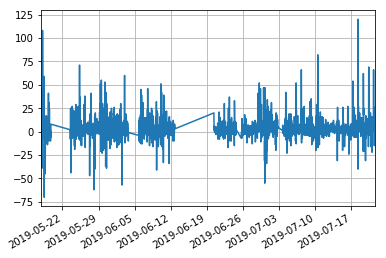

,buyprice,buyquantity,sellprice,sellquantity,diff
2019-05-17 18:30:00,2527.0,1830.0,2526.0,5587.0,1.0
2019-05-17 19:00:00,2513.0,20055.0,2526.0,16407.0,-13.0
2019-05-17 19:30:00,2533.0,12203.0,2487.0,27066.0,46.0
2019-05-17 20:00:00,2507.0,9952.0,2512.0,21063.0,-5.0
2019-05-17 20:30:00,2508.0,16841.0,2505.0,22168.0,3.0


In [70]:
mydata = get_data(536,"buyprice")
mydata['diff'] = mydata['buyprice']-mydata['sellprice']
mypplot('diff',mydata)
mydata.head()

D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Users\yentl creyf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

dataset: buyprice


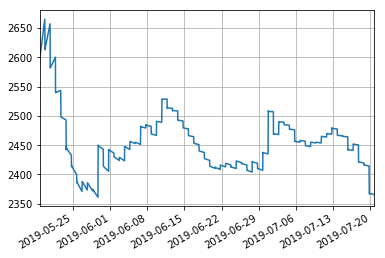

In [71]:
parameter = 'buyprice'
period = 48
r2=pd.DataFrame()
# mydata = data[parameter]

n=int(len(data.index)/48)
for i in range(n):
    if i ==0: continue
    mydata = data[parameter].iloc[0:i*48]
    for i in range(period):
        pred = StartARIMAForecasting(mydata, 3,1,0)
        last_date = (mydata.index[-1] + 1)
        r = pd.DataFrame({'buyprice':pred},index=[last_date])
        frames = [r2,r]
        r2= pd.concat(frames)
        mydata = pd.DataFrame(mydata)
        frames = [mydata,r]
        mydata = pd.concat(frames)
        mind = pd.to_datetime(mydata.index.values, format="%Y-%m-%d %H:%M:%S").min()
        maxd = pd.to_datetime(mydata.index.values, format="%Y-%m-%d %H:%M:%S").max()
        re = pd.date_range(start=mind,end=maxd, freq='30min')
        mydata = mydata.reindex(re,fill_value=np.nan)
    # print(mydata.tail(2))
mypplot('buyprice',r2)

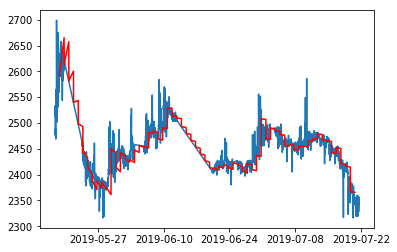

In [72]:
d2 = data
mind = pd.to_datetime(d2.index.values, format="%Y-%m-%d %H:%M:%S").min()
maxd = pd.to_datetime(d2.index.values, format="%Y-%m-%d %H:%M:%S").max()
r = pd.date_range(start=mind,end=maxd, freq='30min')
r2 = r2.reindex(r,fill_value=np.nan)
pyplot.plot(data.index.values,d2['buyprice'])
pyplot.plot(data.index.values,r2['buyprice'], color='red')
pyplot.show()

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


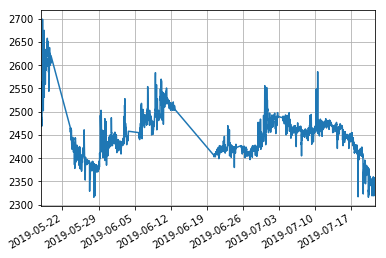

                      buyprice  buyquantity  sellprice  sellquantity
date                                                                
2019-05-17 16:30:00  2627482.0          7.0  2620975.0           4.0
2019-05-17 17:00:00  2624324.0          4.0  2621502.0           7.0
2019-05-17 17:30:00  2626272.0         13.0  2621972.0           9.0
2019-05-17 18:00:00  2625888.0         15.0  2623749.0          14.0
2019-05-17 18:30:00  2626110.0         12.0  2624662.0          18.0
Full Dataset: buyprice
dataset: buyprice


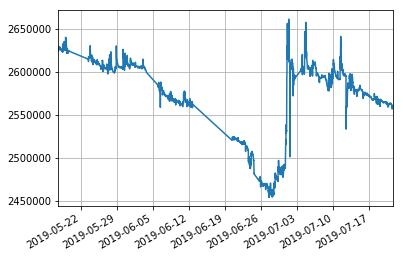

buyprice        0.333323
buyquantity     0.187203
sellprice       0.332246
sellquantity    0.252988
diff           -0.021623
dtype: float64

In [73]:
def get_data(item_id,parameter):
    data = df.loc[item_id]
    print(data.head())
    data = data.replace(0,np.nan)
    # REMOVE DUPLICATES
    data = data.loc[~data.index.duplicated(keep='last')]
    # REINDEX MISSING DATES
    mind = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").min()
    maxd = pd.to_datetime(data.index.values, format="%Y-%m-%d %H:%M:%S").max()
    r = pd.date_range(start=mind,end=maxd, freq='30min')
    data = data.reindex(r,fill_value=np.nan)
    # FILL NAN
    data = data.interpolate(method ='linear', limit_direction ='forward')
    # difference buy and sellprice
    data['diff'] = data['buyprice']-data['sellprice']
    data = data.sort_index()
    # preview
    print('Full Dataset: ' + parameter)
    mypplot(parameter,data)
    
    return data

a = get_data(536,'buyprice')
b = get_data(4151,'buyprice')
a.corrwith(b) 

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


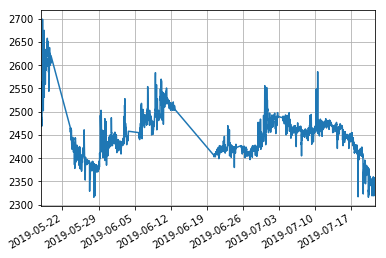

[[2458621.27083333]
 [2458621.29166667]
 [2458621.3125    ]
 ...
 [2458686.10416667]
 [2458686.125     ]
 [2458686.14583333]]
[2527. 2513. 2533. ... 2343. 2341. 2355.]
float64


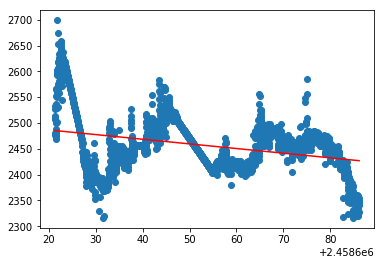

coefficient of determination: 0.10544305533542442
intercept: 2217257.140516376
slope: [-0.90081862]


In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy

item_id = 536
parameter = 'buyprice'
d = get_data(item_id,parameter)
x = d.index.to_julian_date().values.reshape((-1, 1))
y = d[parameter].values
# print(x)
# print(y)
# print(x.dtype)
model = LinearRegression()
model = LinearRegression().fit(x, y)

Y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

[-49119.91490689   2455.35961946]


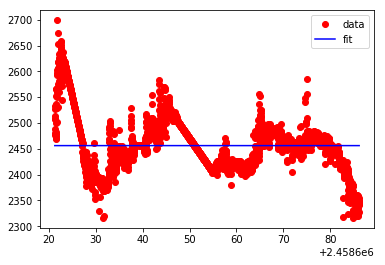

In [75]:
x = d.index.to_julian_date().values
y = d[parameter].values
#fitting function with more than one parameter to fit
def ff(L, v, k):
    return L**(-1/v) * k

pfit, perr = scipy.optimize.curve_fit(ff,x,y)
print(pfit)

#plot original data
plt.plot(x, y, "ro", label = "data")
#calculate y-values
y_fit = ff(x, *pfit)
#plot fitted curve
plt.plot(x, y_fit, "b", label = "fit")
plt.legend()
plt.show()

In [76]:
np.polyfit(np.log(x), y, 1)

array([-2214802.95425687, 32593557.27689939])

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


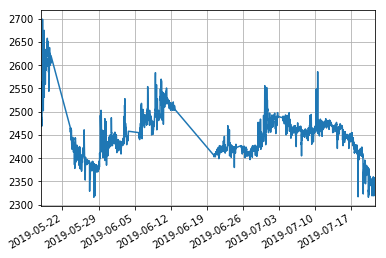

[145519.84698257   2368.56576376]


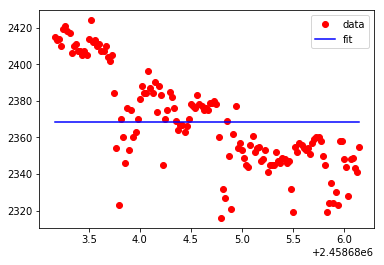

In [88]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

item_id = 536
parameter = 'buyprice'
d = get_data(item_id,parameter)
last_days = len(d.index.to_julian_date().values)-3*48
x = d.index.to_julian_date().values[last_days:]
y = d[parameter].values[last_days:]
#define some sample data


#fitting function with more than one parameter to fit
def ff(L, v, k):
    return L**(-1/v) * k

pfit, perr = curve_fit(ff,x,y)
print(pfit)

#plot original data
plt.plot(x, y, "ro", label = "data")
#calculate y-values
y_fit = ff(x, *pfit)
#plot fitted curve
# plt.plot(x, y_fit, "b", label = "fit")
x_fit = np.linspace(np.min(x), np.max(x), 1000)
plt.plot(x_fit, ff(x_fit, *pfit), "b", label = "fit")
plt.legend()
plt.show()

                     buyprice  buyquantity  sellprice  sellquantity
date                                                               
2019-05-17 18:30:00    2527.0       1830.0     2526.0        5587.0
2019-05-17 19:00:00    2513.0      20055.0     2526.0       16407.0
2019-05-17 19:30:00    2533.0      12203.0     2487.0       27066.0
2019-05-17 20:00:00    2507.0       9952.0     2512.0       21063.0
2019-05-17 20:30:00    2508.0      16841.0     2505.0       22168.0
Full Dataset: buyprice
dataset: buyprice


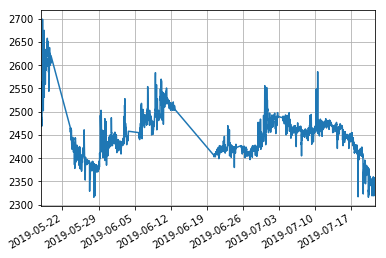

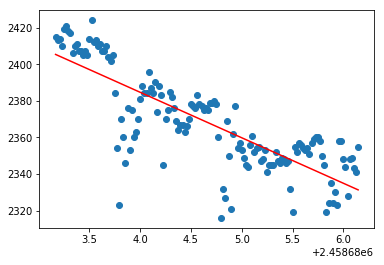

In [91]:
item_id = 536
parameter = 'buyprice'
last_days = len(d.index.to_julian_date().values)-3*48
d = get_data(item_id,parameter)

x = d.index.to_julian_date().values[last_days:].reshape((-1, 1))
y = d[parameter].values[last_days:]
# print(x)
# print(y)
# print(x.dtype)
model = LinearRegression()
model = LinearRegression().fit(x, y)

Y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()